### Load the Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris_df = pd.read_csv("Iris.csv")

### Descriptive Statistics

In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris_df.shape

(150, 6)

In [7]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris = iris_df.groupby('Species',as_index= False)["Id"].count()
iris

,Species,Id
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


### Some visualizations for understanding

#### Relationship between the Sepal Length and Width using scatter plot

Text(0.5,1,'Relationship between Sepal Length and Width')

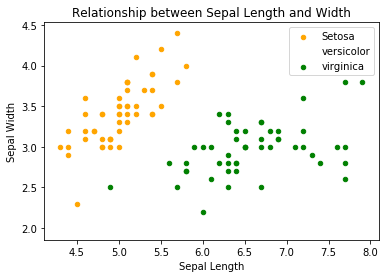

In [10]:
ax = iris_df[iris_df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris_df[iris_df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='white', label='versicolor',ax=ax)
iris_df[iris_df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")

#### Similarly for Petal using the seaborn function

Text(0.5,1,'Relationship between Petal Length and Width')

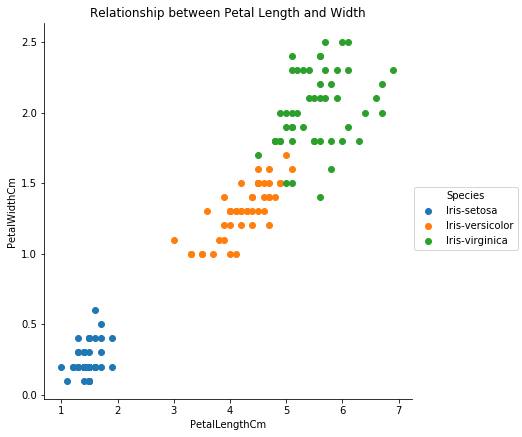

In [11]:
sns.FacetGrid(iris_df, hue="Species", size=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.title("Relationship between Petal Length and Width")

#### Coorelation between the features

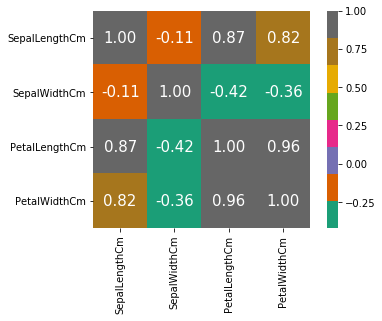

In [12]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
corr_matrix = iris_df[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

### Machine Learning with IRIS data

In [13]:
dataset = np.array(iris_df[["PetalLengthCm","PetalWidthCm","SepalLengthCm","SepalWidthCm"]])

key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Y = iris_df['Species'].map(key)

In [14]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset,Y,test_size=0.2,random_state=42)

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='gini',max_depth=4,presort=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC(C=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667